## TPE vs SNR scenario in the stationary case

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scienceplots
plt.style.use(['science', 'grid'])
plt.rcParams['text.usetex'] = True

In [20]:
df = pd.read_csv('data/TEP_vs_SNR.csv')

In [22]:
# Random choice of SNR
snr_name = np.random.choice(df.columns[1:])
snr = float(snr_name)

print(f"Selected SNR : {snr} dB")

Selected SNR : 1.0 dB


In [23]:
# TEP and bitrates for each modulation method
tep_values = df[snr_name].values
bitrates = np.array([2520, 840, 360, 168])

In [24]:
def fit(bitrates, tep_values, n_iter=1000, eps=0.05):
    """Train the agent using incrementally computed sample averages and
    epsilon-greedy action selection.

    Parameters
    ----------
    bitrates: array-like
        Bitrate (in bits/s) of each modulation method
    tep_values: array-like
        TEP values of each modulation method
    n_iter: int, default 100
        Number of iterations
    eps: float, default 0.05
        Probability of selecting a non-greedy action instead of the greedy one

    Returns
    -------
    Q: array-like
        The estimated action values
    total_reward: float
        The total reward. It is the sum of the bitrates used during the run.
    """
    k = bitrates.size # Number of modulation methods i.e. number of actions
    Q = np.zeros(k)
    N = np.zeros(k) # Number of times each action was chosen
    total_reward = 0
    
    for _ in range(n_iter):
        # epsilon-greedy action selection
        if np.random.random() <= eps:
            a = np.random.randint(k)
        else:
            a = np.argmax(Q)

        # Reward computation
        if np.random.random() < tep_values[a]:
            R = 0 # Non-transmitted packet
        else:
            R = bitrates[a]

        total_reward += R

        # Update of action value using sample-average method
        N[a] += 1
        Q[a] += (R - Q[a]) / N[a]

    return Q, total_reward

### Influence of $\varepsilon$ on the total reward

In [49]:
# Experience parameters
n_iter = 10000
eps_range = np.linspace(0, 1, num=100)
total_rewards = np.array([])

In [51]:
# Compute the total reward for each epsilon

for eps in eps_range:
    _, total_reward = fit(bitrates, tep_values, n_iter, eps)
    total_rewards = np.concatenate((total_rewards, np.array([total_reward])))

total_rewards /= np.max(total_rewards)

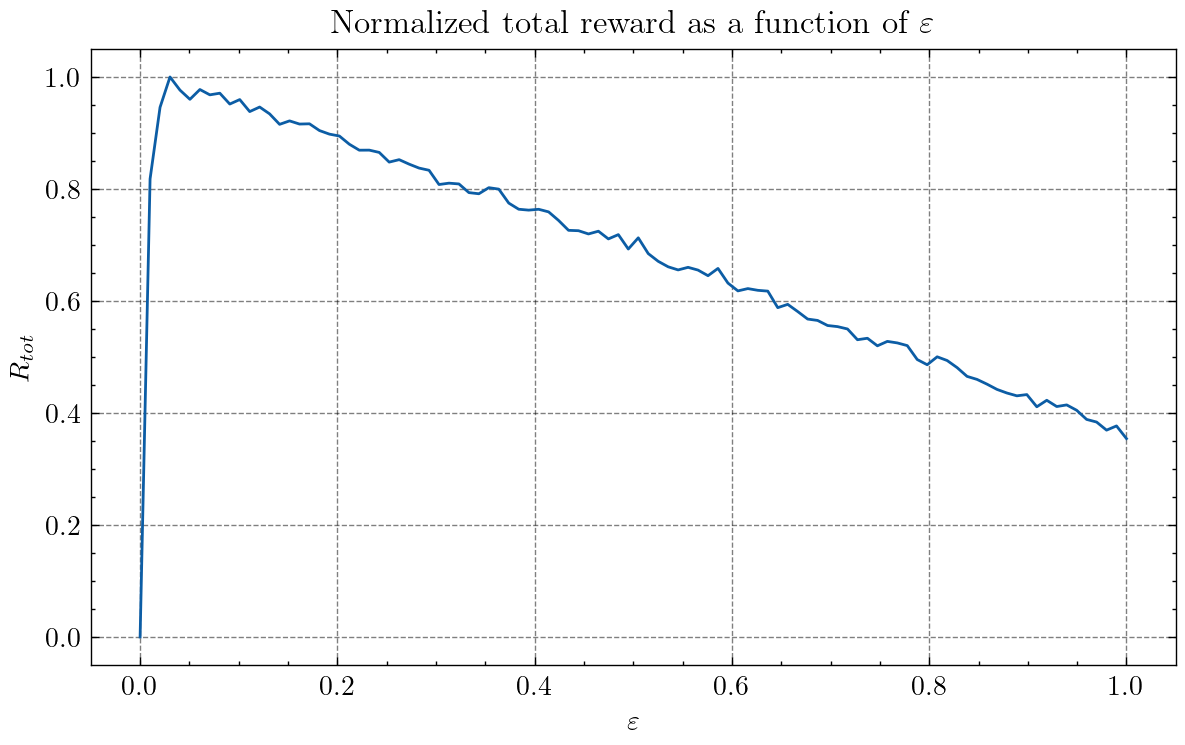

In [55]:
# Plot total_reward = f(epsilon)

plt.figure(figsize=(7,4), dpi=200)
plt.plot(eps_range, total_rewards)
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$R_{tot}$')
plt.title(r'Normalized total reward as a function of $\varepsilon$')
plt.show()

In [54]:
print(f"Optimal computed epsilon: {eps_range[np.argmax(total_rewards)]:.3f}")

Optimal computed epsilon: 0.030


**Observations:**
- Neither the greedy selection method (i.e. $\varepsilon=0$) nor the random selection method (i.e. $\varepsilon=1$) are the optimal ones. A small value of $\varepsilon$ like $\varepsilon=0.05$ leads to better results in terms of total reward.
- Because of the absence of exploration, the greedy action selection method seems worse than the random one.
- The overall trend shows that total reward decreases as $\varepsilon$ increases. So it seems that exploration should be restricted and negligible compared to exploitation.